In [1]:
# Imports
import pandas
import json

# Prepare data

In [5]:
def GetReleaseDate(orig):
    if pandas.isna(orig):
        return 1900
    yr = int(orig.split('/')[2])
    if yr <= 19:
        return 2000 + yr
    else:
        return 1900 + yr

def GetReleaseMonth(orig):
    if pandas.isna(orig):
        return 0
    return int(orig.split('/')[1])

import ast
def get_dictionary(s):
    try:
        d = ast.literal_eval(s)
    except ValueError as err:
        if not pandas.isna(s):
            print("get_dictionary error: {}".format(err))
        d = {}    
    return d

def GetCountryCodes(raw):
    return [x.get('iso_3166_1', 'NA').lower() for x in get_dictionary(raw)]

def GetGenres(raw):
    return [x.get('name', 'NA').lower() for x in get_dictionary(raw)]

def GetProductionCompanies(raw):
    return [x.get('name', 'NA').lower().replace(' ', '_')
            for x in get_dictionary(raw)]

class TransformerState:
    def __init__(self):
        pass
    
def TransformAndFix(train, test):
    t_production_countries = train['production_countries'].apply(GetCountryCodes)
    t_genres = train['genres'].apply(GetGenres)    
    t_production_companies = train['production_companies'].apply(GetProductionCompanies)
    ret = TransformerState()
    ret.genres = pandas.Series(t_genres.sum()).value_counts()
    ret.countries = pandas.Series(t_production_countries.sum()).value_counts()
    ret.production_companies = pandas.Series(t_production_companies.sum()).value_counts()
    
    ret.genres = ret.genres[ret.genres > 50]
    ret.countries = ret.countries[ret.countries > 10]
    ret.production_companies = ret.production_companies[ret.production_companies > 10]

    for data in [train, test]:
        data['t_release_yr'] = data['release_date'].apply(GetReleaseDate)
        data['t_release_mo'] = data['release_date'].apply(GetReleaseMonth)
        for g in ret.production_companies.keys():
            data['t_production_company_{}'.format(g)] = \
                data['production_companies'].apply(lambda x: g in GetProductionCompanies(x))

        for g in ret.genres.keys():
            data['t_genre_{}'.format(g)] = \
                data['genres'].apply(lambda x: g in GetGenres(x))
        for g in ret.countries.keys():
            data['t_production_country_{}'.format(g)] = \
                data['production_countries'].apply(lambda x: g in GetCountryCodes(x))
    return ret

In [6]:
train_orig = pandas.read_csv('train.csv')
test_orig = pandas.read_csv('test.csv')

train = train_orig.copy()
test = test_orig.copy()

In [7]:
transformer_state = TransformAndFix(train, test)

In [8]:
to_remove = {'id', 'belongs_to_collection', 'genres', 'homepage',
             'imdb_id', 'original_language', 'original_title', 'overview',
             'production_companies', 'production_countries', 'release_date', 
             'runtime', 'spoken_languages', 'status', 'tagline', 'title', 
             'Keywords', 'cast', 'crew', 'poster_path', 'revenue'}
useful_columns = [c for c in train.columns if c not in to_remove ]

In [9]:
train[useful_columns].head()

,budget,popularity,t_release_yr,t_release_mo,t_production_company_warner_bros.,t_production_company_universal_pictures,t_production_company_paramount_pictures,t_production_company_twentieth_century_fox_film_corporation,t_production_company_columbia_pictures,t_production_company_metro-goldwyn-mayer_(mgm),...,t_production_country_be,t_production_country_ie,t_production_country_kr,t_production_country_mx,t_production_country_se,t_production_country_nz,t_production_country_nl,t_production_country_cz,t_production_country_dk,t_production_country_br
0,14000000,6.575393,2015,20,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,40000000,8.248895,2004,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3300000,64.299990,2014,10,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200000,3.174936,2012,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1.148070,2009,5,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [10]:
test[useful_columns].head()

,budget,popularity,t_release_yr,t_release_mo,t_production_company_warner_bros.,t_production_company_universal_pictures,t_production_company_paramount_pictures,t_production_company_twentieth_century_fox_film_corporation,t_production_company_columbia_pictures,t_production_company_metro-goldwyn-mayer_(mgm),...,t_production_country_be,t_production_country_ie,t_production_country_kr,t_production_country_mx,t_production_country_se,t_production_country_nz,t_production_country_nl,t_production_country_cz,t_production_country_dk,t_production_country_br
0,0,3.851534,2007,14,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,88000,3.559789,1958,19,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,8.085194,1997,23,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6800000,8.596012,2010,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000000,3.217680,2005,11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Traning

In [11]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
import numpy as np

def score(data, y):
    validation_res = pandas.DataFrame({
        "id": data["id"].values,
         "actual": data["revenue"].values,
         "predicted": np.expm1(y)})

    validation_res = validation_res.groupby("id")["actual", "predicted"].sum().reset_index()
    return np.sqrt(mean_squared_error(np.log1p(validation_res["actual"].values), 
                                      np.log1p(validation_res["predicted"].values)))

class KFoldValidation():
    def __init__(self, data, n_splits=5):
        unique_vis = np.array(sorted(data['id'].unique()))
        folds = GroupKFold(n_splits)
        ids = np.arange(data.shape[0])
        
        self.fold_ids = []
        for train_ids, validation_ids in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
            self.fold_ids.append([
                    ids[data['id'].isin(unique_vis[train_ids])],
                    ids[data['id'].isin(unique_vis[validation_ids])]
                ])
            
    def validate(self, train, test, features, model, name="", prepare_stacking=False, 
                 fit_params={"early_stopping_rounds": 500, "verbose": 100, "eval_metric": "rmse"}):
        full_score = 0
        if prepare_stacking:
            assert name != ""
            test[name] = 0
            train[name] = np.NaN
        
        for fold_id, (trn, val) in enumerate(self.fold_ids):
            # Prepare training and validation data.
            devel = train[features].iloc[trn]
            y_devel = np.log1p(train["revenue"].iloc[trn])
            valid = train[features].iloc[val]
            y_valid = np.log1p(train["revenue"].iloc[val])
            # Train the model.
            model.fit(devel, y_devel, eval_set=[(valid, y_valid)], **fit_params)
            # Compute feature importance.
            if len(model.feature_importances_) == len(features):
                model.FI = pandas.DataFrame(index=features)
                model.FI['fold' + str(fold_id)] = model.feature_importances_ / model.feature_importances_.sum()

            # Compute error using cross validaiton set.
            predictions = model.predict(valid)
            predictions[predictions < 0] = 0
            print("Fold: ", fold_id, " error: ", mean_squared_error(y_valid, predictions)**0.5)
            
            fold_score = score(train.iloc[val], predictions)
            full_score += fold_score / len(self.fold_ids)
            print("Fold ", fold_id, " score: ", fold_score)
            if prepare_stacking:
                train[name].iloc[val] = predictions
                test_predictions = model.predict(test[features])
                test_predictions[test_predictions < 0] = 0
                test[name] += test_predictions / len(self.fold_ids)
                
        print("Final score: ", full_score)
        return full_score

In [12]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
import random
xgbmodel = xgb.XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            seed=random.randint(0, 10000),
                            silent=True,
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

catmodel = cat.CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.8,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_seed=random.randint(0, 10000))

lgbmodel = lgb.LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             bagging_seed=random.randint(0, 10000), 
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)

In [13]:
kfolder = KFoldValidation(train, 5)
kfolder.validate(train, test, useful_columns, xgbmodel, name="xgb", prepare_stacking=True)

[0]	validation_0-rmse:15.5716
Will train until validation_0-rmse hasn't improved in 500 rounds.


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	validation_0-rmse:6.12031
[200]	validation_0-rmse:3.11186
[300]	validation_0-rmse:2.43002
[400]	validation_0-rmse:2.30996
[500]	validation_0-rmse:2.28495
[600]	validation_0-rmse:2.27225
[700]	validation_0-rmse:2.26369
[800]	validation_0-rmse:2.25733
[900]	validation_0-rmse:2.25218
[1000]	validation_0-rmse:2.24932
[1100]	validation_0-rmse:2.24648
[1200]	validation_0-rmse:2.24245
[1300]	validation_0-rmse:2.24266
[1400]	validation_0-rmse:2.23898
[1500]	validation_0-rmse:2.2362
[1600]	validation_0-rmse:2.23521
[1700]	validation_0-rmse:2.23531
[1800]	validation_0-rmse:2.23454
[1900]	validation_0-rmse:2.23477
[2000]	validation_0-rmse:2.23403
[2100]	validation_0-rmse:2.23289
[2200]	validation_0-rmse:2.23306
[2300]	validation_0-rmse:2.23319
[2400]	validation_0-rmse:2.23397
[2500]	validation_0-rmse:2.23553
[2600]	validation_0-rmse:2.23739
Stopping. Best iteration:
[2134]	validation_0-rmse:2.23198

Fold:  0  error:  2.2319785444549183
Fold  0  score:  2.2319785444549183


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[0]	validation_0-rmse:15.5409
Will train until validation_0-rmse hasn't improved in 500 rounds.


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	validation_0-rmse:6.06514
[200]	validation_0-rmse:2.96734
[300]	validation_0-rmse:2.21749
[400]	validation_0-rmse:2.07956
[500]	validation_0-rmse:2.056
[600]	validation_0-rmse:2.05173
[700]	validation_0-rmse:2.05232
[800]	validation_0-rmse:2.05282
[900]	validation_0-rmse:2.05599
[1000]	validation_0-rmse:2.05703
[1100]	validation_0-rmse:2.06016
[1200]	validation_0-rmse:2.06211
Stopping. Best iteration:
[730]	validation_0-rmse:2.051

Fold:  1  error:  2.050997413981731
Fold  1  score:  2.050997413981731


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:15.7434
Will train until validation_0-rmse hasn't improved in 500 rounds.
[100]	validation_0-rmse:6.22597
[200]	validation_0-rmse:3.00113
[300]	validation_0-rmse:2.09233
[400]	validation_0-rmse:1.87161
[500]	validation_0-rmse:1.81042
[600]	validation_0-rmse:1.7891
[700]	validation_0-rmse:1.77646
[800]	validation_0-rmse:1.7709
[900]	validation_0-rmse:1.76315
[1000]	validation_0-rmse:1.75701
[1100]	validation_0-rmse:1.75213
[1200]	validation_0-rmse:1.74857
[1300]	validation_0-rmse:1.74379
[1400]	validation_0-rmse:1.74455
[1500]	validation_0-rmse:1.742
[1600]	validation_0-rmse:1.74166
[1700]	validation_0-rmse:1.74294
[1800]	validation_0-rmse:1.74451
[1900]	validation_0-rmse:1.74353
[2000]	validation_0-rmse:1.74429
Stopping. Best iteration:
[1563]	validation_0-rmse:1.74072

Fold:  2  error:  1.7407173332773485
Fold  2  score:  1.7407173332773485


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[0]	validation_0-rmse:15.6491
Will train until validation_0-rmse hasn't improved in 500 rounds.


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	validation_0-rmse:6.1444
[200]	validation_0-rmse:3.03618
[300]	validation_0-rmse:2.27039
[400]	validation_0-rmse:2.12224
[500]	validation_0-rmse:2.08403
[600]	validation_0-rmse:2.07122
[700]	validation_0-rmse:2.06605
[800]	validation_0-rmse:2.05872
[900]	validation_0-rmse:2.05448
[1000]	validation_0-rmse:2.04982
[1100]	validation_0-rmse:2.0465
[1200]	validation_0-rmse:2.04359
[1300]	validation_0-rmse:2.04119
[1400]	validation_0-rmse:2.0414
[1500]	validation_0-rmse:2.03982
[1600]	validation_0-rmse:2.03816
[1700]	validation_0-rmse:2.03662
[1800]	validation_0-rmse:2.03642
[1900]	validation_0-rmse:2.03533
[2000]	validation_0-rmse:2.03525
[2100]	validation_0-rmse:2.03552
[2200]	validation_0-rmse:2.03584
[2300]	validation_0-rmse:2.03575
[2400]	validation_0-rmse:2.03661
Stopping. Best iteration:
[1970]	validation_0-rmse:2.03466

Fold:  3  error:  2.0346654480066846
Fold  3  score:  2.0346654480066846


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[0]	validation_0-rmse:15.5359
Will train until validation_0-rmse hasn't improved in 500 rounds.


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	validation_0-rmse:6.12041
[200]	validation_0-rmse:3.17688
[300]	validation_0-rmse:2.5317
[400]	validation_0-rmse:2.41063
[500]	validation_0-rmse:2.38537
[600]	validation_0-rmse:2.37698
[700]	validation_0-rmse:2.37575
[800]	validation_0-rmse:2.37427
[900]	validation_0-rmse:2.37342
[1000]	validation_0-rmse:2.36942
[1100]	validation_0-rmse:2.35963
[1200]	validation_0-rmse:2.35839
[1300]	validation_0-rmse:2.35917
[1400]	validation_0-rmse:2.35612
[1500]	validation_0-rmse:2.35324
[1600]	validation_0-rmse:2.34483
[1700]	validation_0-rmse:2.34367
[1800]	validation_0-rmse:2.34225
[1900]	validation_0-rmse:2.33917
[2000]	validation_0-rmse:2.33785
[2100]	validation_0-rmse:2.33614
[2200]	validation_0-rmse:2.33529
[2300]	validation_0-rmse:2.33607
[2400]	validation_0-rmse:2.3377
[2500]	validation_0-rmse:2.33841
[2600]	validation_0-rmse:2.33758
[2700]	validation_0-rmse:2.33629
Stopping. Best iteration:
[2239]	validation_0-rmse:2.33438

Fold:  4  error:  2.3343752558613833
Fold  4  score:  2.3343

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Final score:  2.078546799116413


2.078546799116413

In [14]:
kfolder.validate(train, test, useful_columns,
                 catmodel, name="cat", prepare_stacking=True,
                 fit_params={"use_best_model": True, "verbose": 100})

0:	learn: 16.1050974	test: 16.0586953	best: 16.0586953 (0)	total: 64.2ms	remaining: 10m 41s
100:	learn: 6.4323172	test: 6.4464048	best: 6.4464048 (100)	total: 397ms	remaining: 38.9s
200:	learn: 3.2387243	test: 3.3685742	best: 3.3685742 (200)	total: 815ms	remaining: 39.7s
300:	learn: 2.4091207	test: 2.6256680	best: 2.6256680 (300)	total: 1.31s	remaining: 42.2s
400:	learn: 2.2264038	test: 2.4717992	best: 2.4717992 (400)	total: 1.68s	remaining: 40.2s
500:	learn: 2.1695300	test: 2.4209774	best: 2.4209774 (500)	total: 1.97s	remaining: 37.4s
600:	learn: 2.1409644	test: 2.3945584	best: 2.3945584 (600)	total: 2.3s	remaining: 36s
700:	learn: 2.1091376	test: 2.3743669	best: 2.3743669 (700)	total: 2.6s	remaining: 34.4s
800:	learn: 2.0865730	test: 2.3580737	best: 2.3580737 (800)	total: 2.87s	remaining: 32.9s
900:	learn: 2.0700970	test: 2.3477444	best: 2.3477444 (900)	total: 3.15s	remaining: 31.8s
1000:	learn: 2.0196365	test: 2.3287519	best: 2.3287519 (1000)	total: 3.41s	remaining: 30.6s
1100:	lear

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0:	learn: 16.1132920	test: 16.0298761	best: 16.0298761 (0)	total: 6.07ms	remaining: 1m
100:	learn: 6.4695201	test: 6.3966080	best: 6.3966080 (100)	total: 314ms	remaining: 30.8s
200:	learn: 3.2892044	test: 3.2130958	best: 3.2130958 (200)	total: 613ms	remaining: 29.9s
300:	learn: 2.4704726	test: 2.3902477	best: 2.3902477 (300)	total: 951ms	remaining: 30.7s
400:	learn: 2.2794941	test: 2.2076350	best: 2.2076350 (400)	total: 1.26s	remaining: 30.1s
500:	learn: 2.2215263	test: 2.1599495	best: 2.1599495 (500)	total: 1.56s	remaining: 29.6s
600:	learn: 2.1933202	test: 2.1399511	best: 2.1399511 (600)	total: 1.9s	remaining: 29.7s
700:	learn: 2.1711918	test: 2.1268510	best: 2.1268510 (700)	total: 2.2s	remaining: 29.1s
800:	learn: 2.1513205	test: 2.1160481	best: 2.1160481 (800)	total: 2.48s	remaining: 28.5s
900:	learn: 2.1306812	test: 2.1043036	best: 2.1043036 (900)	total: 2.8s	remaining: 28.3s
1000:	learn: 2.1044827	test: 2.0907029	best: 2.0907003 (999)	total: 3.08s	remaining: 27.7s
1100:	learn: 2.

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0:	learn: 16.0626647	test: 16.2327517	best: 16.2327517 (0)	total: 5.28ms	remaining: 52.8s
100:	learn: 6.4627934	test: 6.5526983	best: 6.5526983 (100)	total: 329ms	remaining: 32.2s
200:	learn: 3.3167858	test: 3.2360147	best: 3.2360147 (200)	total: 694ms	remaining: 33.8s
300:	learn: 2.5097777	test: 2.2737158	best: 2.2737158 (300)	total: 1.04s	remaining: 33.4s
400:	learn: 2.3321177	test: 2.0257027	best: 2.0257027 (400)	total: 1.39s	remaining: 33.4s
500:	learn: 2.2729830	test: 1.9450252	best: 1.9450252 (500)	total: 1.78s	remaining: 33.8s
600:	learn: 2.2409821	test: 1.9089367	best: 1.9089367 (600)	total: 2.13s	remaining: 33.3s
700:	learn: 2.2146390	test: 1.8881116	best: 1.8881116 (700)	total: 2.46s	remaining: 32.7s
800:	learn: 2.1936005	test: 1.8759859	best: 1.8759001 (799)	total: 2.93s	remaining: 33.7s
900:	learn: 2.1690312	test: 1.8628403	best: 1.8628403 (900)	total: 3.27s	remaining: 33s
1000:	learn: 2.1389359	test: 1.8474477	best: 1.8474388 (997)	total: 3.61s	remaining: 32.5s
1100:	learn

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0:	learn: 16.0862529	test: 16.1373041	best: 16.1373041 (0)	total: 3.88ms	remaining: 38.8s
100:	learn: 6.4674371	test: 6.4910743	best: 6.4910743 (100)	total: 383ms	remaining: 37.5s
200:	learn: 3.2929402	test: 3.2765608	best: 3.2765608 (200)	total: 716ms	remaining: 34.9s
300:	learn: 2.4578909	test: 2.4273298	best: 2.4273298 (300)	total: 1.1s	remaining: 35.4s
400:	learn: 2.2626137	test: 2.2383065	best: 2.2383065 (400)	total: 1.51s	remaining: 36.1s
500:	learn: 2.2000349	test: 2.1869518	best: 2.1869518 (500)	total: 1.88s	remaining: 35.6s
600:	learn: 2.1692860	test: 2.1684819	best: 2.1684819 (600)	total: 2.33s	remaining: 36.5s
700:	learn: 2.1473280	test: 2.1571862	best: 2.1571862 (700)	total: 2.7s	remaining: 35.8s
800:	learn: 2.1191691	test: 2.1433415	best: 2.1433415 (800)	total: 3.14s	remaining: 36.1s
900:	learn: 2.0797968	test: 2.1209867	best: 2.1209867 (900)	total: 3.5s	remaining: 35.4s
1000:	learn: 2.0391845	test: 2.0973775	best: 2.0973543 (999)	total: 3.93s	remaining: 35.3s
1100:	learn:

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0:	learn: 16.1139538	test: 16.0219639	best: 16.0219639 (0)	total: 6.17ms	remaining: 1m 1s
100:	learn: 6.4470434	test: 6.4556305	best: 6.4556305 (100)	total: 342ms	remaining: 33.5s
200:	learn: 3.2477493	test: 3.3987251	best: 3.3987251 (200)	total: 811ms	remaining: 39.5s
300:	learn: 2.3925175	test: 2.6615252	best: 2.6615252 (300)	total: 1.2s	remaining: 38.7s
400:	learn: 2.1898663	test: 2.5204455	best: 2.5204455 (400)	total: 1.57s	remaining: 37.6s
500:	learn: 2.1266445	test: 2.4883630	best: 2.4883630 (500)	total: 1.99s	remaining: 37.8s
600:	learn: 2.0964425	test: 2.4736441	best: 2.4736441 (600)	total: 2.37s	remaining: 37s
700:	learn: 2.0734617	test: 2.4598417	best: 2.4597792 (694)	total: 2.79s	remaining: 37s
800:	learn: 2.0497942	test: 2.4455500	best: 2.4455500 (800)	total: 3.15s	remaining: 36.2s
900:	learn: 2.0340731	test: 2.4360357	best: 2.4360357 (900)	total: 3.49s	remaining: 35.3s
1000:	learn: 2.0095480	test: 2.4187546	best: 2.4187546 (1000)	total: 3.8s	remaining: 34.2s
1100:	learn: 1

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2.0953616289982935

In [15]:
kfolder.validate(train, test, useful_columns, lgbmodel, name="lgb", prepare_stacking=True)

Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.51303
[200]	valid_0's rmse: 2.36333
[300]	valid_0's rmse: 2.3155
[400]	valid_0's rmse: 2.29759
[500]	valid_0's rmse: 2.28471
[600]	valid_0's rmse: 2.27709
[700]	valid_0's rmse: 2.27253
[800]	valid_0's rmse: 2.26916
[900]	valid_0's rmse: 2.26651
[1000]	valid_0's rmse: 2.26365
[1100]	valid_0's rmse: 2.26073
[1200]	valid_0's rmse: 2.26099
[1300]	valid_0's rmse: 2.26044
[1400]	valid_0's rmse: 2.25935
[1500]	valid_0's rmse: 2.25954
[1600]	valid_0's rmse: 2.25869
[1700]	valid_0's rmse: 2.25897
[1800]	valid_0's rmse: 2.25987
[1900]	valid_0's rmse: 2.25984
[2000]	valid_0's rmse: 2.26099
[2100]	valid_0's rmse: 2.2629
Early stopping, best iteration is:
[1613]	valid_0's rmse: 2.25789
Fold:  0  error:  2.2578928022746085
Fold  0  score:  2.2578928022746085


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.22853
[200]	valid_0's rmse: 2.07147
[300]	valid_0's rmse: 2.03329
[400]	valid_0's rmse: 2.02274
[500]	valid_0's rmse: 2.01974
[600]	valid_0's rmse: 2.02017
[700]	valid_0's rmse: 2.02076
[800]	valid_0's rmse: 2.021
[900]	valid_0's rmse: 2.02264
Early stopping, best iteration is:
[469]	valid_0's rmse: 2.0185
Fold:  1  error:  2.0184959713359514
Fold  1  score:  2.0184959713359514


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.03315
[200]	valid_0's rmse: 1.84799
[300]	valid_0's rmse: 1.79101
[400]	valid_0's rmse: 1.77205
[500]	valid_0's rmse: 1.76145
[600]	valid_0's rmse: 1.75747
[700]	valid_0's rmse: 1.75484
[800]	valid_0's rmse: 1.75451
[900]	valid_0's rmse: 1.75432
[1000]	valid_0's rmse: 1.75249
[1100]	valid_0's rmse: 1.75179
[1200]	valid_0's rmse: 1.75261
[1300]	valid_0's rmse: 1.75448
[1400]	valid_0's rmse: 1.75488
[1500]	valid_0's rmse: 1.75549
[1600]	valid_0's rmse: 1.75656
Early stopping, best iteration is:
[1130]	valid_0's rmse: 1.75127
Fold:  2  error:  1.7512685459890296
Fold  2  score:  1.7512685459890296


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.26908
[200]	valid_0's rmse: 2.11921
[300]	valid_0's rmse: 2.07753
[400]	valid_0's rmse: 2.05804
[500]	valid_0's rmse: 2.04735
[600]	valid_0's rmse: 2.04059
[700]	valid_0's rmse: 2.03539
[800]	valid_0's rmse: 2.0292
[900]	valid_0's rmse: 2.02516
[1000]	valid_0's rmse: 2.02341
[1100]	valid_0's rmse: 2.01974
[1200]	valid_0's rmse: 2.01715
[1300]	valid_0's rmse: 2.01595
[1400]	valid_0's rmse: 2.01372
[1500]	valid_0's rmse: 2.01293
[1600]	valid_0's rmse: 2.01087
[1700]	valid_0's rmse: 2.00987
[1800]	valid_0's rmse: 2.0078
[1900]	valid_0's rmse: 2.00727
[2000]	valid_0's rmse: 2.00589
[2100]	valid_0's rmse: 2.00502
[2200]	valid_0's rmse: 2.00574
[2300]	valid_0's rmse: 2.00543
[2400]	valid_0's rmse: 2.00646
[2500]	valid_0's rmse: 2.00849
[2600]	valid_0's rmse: 2.00815
Early stopping, best iteration is:
[2127]	valid_0's rmse: 2.00479
Fold:  3  error:  2.0047900261942746
Fold  3  score:  2.0047900261942746


/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.61045
[200]	valid_0's rmse: 2.45368
[300]	valid_0's rmse: 2.38504
[400]	valid_0's rmse: 2.35075
[500]	valid_0's rmse: 2.33583
[600]	valid_0's rmse: 2.32937
[700]	valid_0's rmse: 2.32799
[800]	valid_0's rmse: 2.3279
[900]	valid_0's rmse: 2.32726
[1000]	valid_0's rmse: 2.3259
[1100]	valid_0's rmse: 2.32141
[1200]	valid_0's rmse: 2.32095
[1300]	valid_0's rmse: 2.31859
[1400]	valid_0's rmse: 2.3177
[1500]	valid_0's rmse: 2.31556
[1600]	valid_0's rmse: 2.31292
[1700]	valid_0's rmse: 2.31148
[1800]	valid_0's rmse: 2.31101
[1900]	valid_0's rmse: 2.30875
[2000]	valid_0's rmse: 2.30328
[2100]	valid_0's rmse: 2.30252
[2200]	valid_0's rmse: 2.30141
[2300]	valid_0's rmse: 2.29859
[2400]	valid_0's rmse: 2.29974
[2500]	valid_0's rmse: 2.29956
[2600]	valid_0's rmse: 2.29932
[2700]	valid_0's rmse: 2.29879
[2800]	valid_0's rmse: 2.2995
[2900]	valid_0's rmse: 2.30108
[3000]	valid_0's rmse: 2.30113
[3100]	valid_0's rms

/home/stps/.virtualenvs/kaggle3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Final score:  2.066135920390039


2.066135920390039

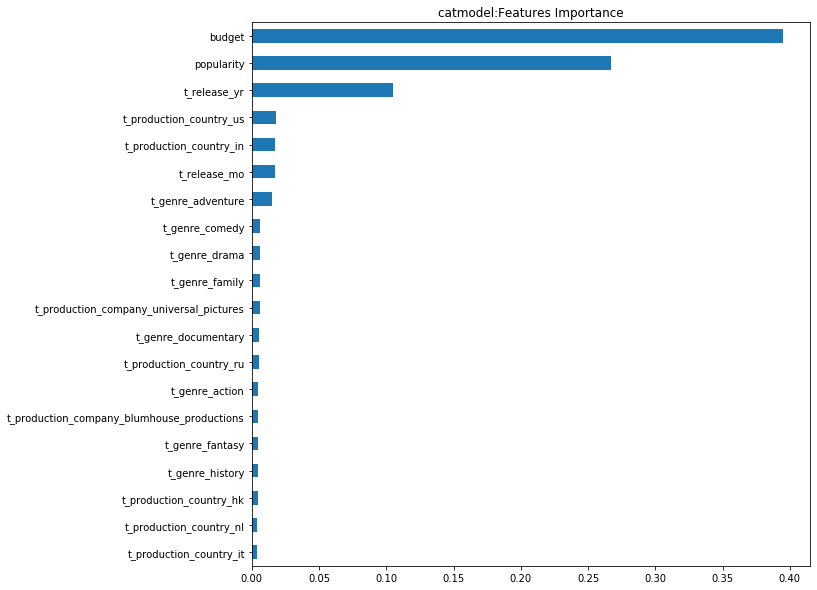

In [25]:
catmodel.FI.mean(axis=1).sort_values().tail(20).plot(
    kind="barh",
    title = "catmodel:Features Importance",
    figsize = (10,10))

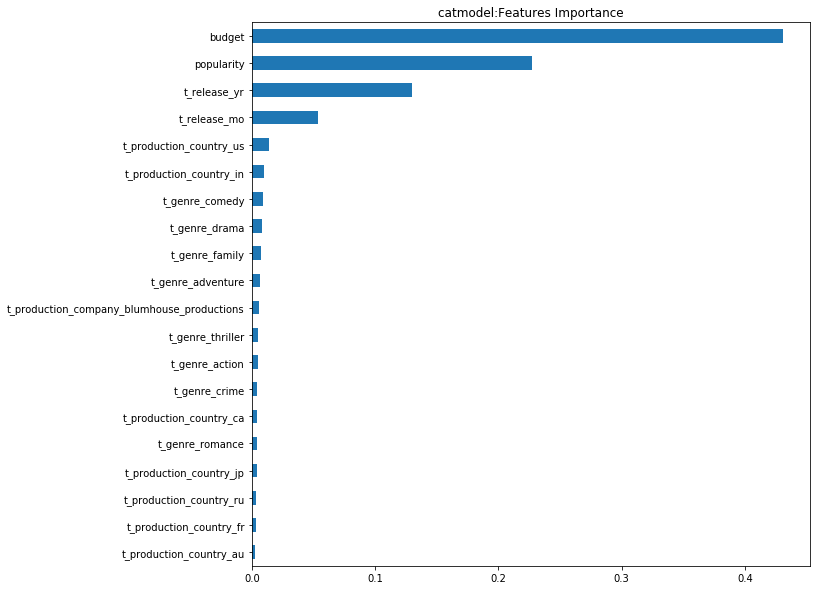

In [17]:
lgbmodel.FI.mean(axis=1).sort_values().tail(20).plot(
    kind="barh",
    title = "catmodel:Features Importance",
    figsize = (10,10))

In [18]:
test['revenue'] =  np.expm1(test["xgb"])
test[['id','revenue']].to_csv('submission_xgb.csv', index=False)
test[['id','revenue']].head()

,id,revenue
0,3001,1.089432e+07
1,3002,1.506166e+06
2,3003,8.073292e+06
3,3004,1.415455e+06
4,3005,8.911872e+05


In [19]:
def dot_sum(A, B):
    return sum(a*b for a,b in zip(A, B))

train['mix1'] = dot_sum((0.4, 0.2, 0.4),
                        (train['xgb'], train['cat'], train['lgb']))
test['mix1'] = dot_sum((0.4, 0.2, 0.4),
                        (test['xgb'], test['cat'], test['lgb']))

train['mix2'] = dot_sum((0.34, 0.33, 0.33),
                        (train['xgb'], train['cat'], train['lgb']))
test['mix2'] = dot_sum((0.34, 0.33, 0.33),
                        (test['xgb'], test['cat'], test['lgb']))

for model_name in ('mix1', 'mix2', 'xgb', 'lgb', 'cat'):
    print("RMSE model {}: {}".format(model_name, score(train, train[model_name])))

RMSE model mix1: 2.067552617761036
RMSE model mix2: 2.0672014724337076
RMSE model xgb: 2.0884246105583597
RMSE model lgb: 2.075591576654662
RMSE model cat: 2.1044126075387743


# Submission

In [20]:
for model_name in ('mix1', 'mix2', 'xgb', 'lgb', 'cat'):
    print("Generating submission for ", model_name)
    test['revenue'] =  np.expm1(test[model_name])
    test[['id','revenue']].to_csv(
        'basic/submission_{}.csv'.format(model_name),
        index=False)
    print(test[['id','revenue']].head())

Generating submission for  mix1
     id       revenue
0  3001  9.275699e+06
1  3002  1.843582e+06
2  3003  7.932454e+06
3  3004  1.770137e+06
4  3005  1.065510e+06
Generating submission for  mix2
     id       revenue
0  3001  7.429576e+06
1  3002  1.766492e+06
2  3003  7.485621e+06
3  3004  2.033845e+06
4  3005  1.011084e+06
Generating submission for  xgb
     id       revenue
0  3001  1.089432e+07
1  3002  1.506166e+06
2  3003  8.073292e+06
3  3004  1.415455e+06
4  3005  8.911872e+05
Generating submission for  lgb
     id       revenue
0  3001  1.554815e+07
1  3002  2.552741e+06
2  3003  9.296048e+06
3  3004  1.443490e+06
4  3005  1.485237e+06
Generating submission for  cat
     id       revenue
0  3001  2.393183e+06
1  3002  1.440633e+06
2  3003  5.576218e+06
3  3004  4.163075e+06
4  3005  7.838948e+05
